#  <font color='#FFE15D'><b>💎 Project 1: Language Modeling 🎼</b></font>


# 🔴 **Import Libs**

In [ ]:
!pip install -q torch==2.3.0

In [ ]:
! pip install -q torchtext==0.18.0

In [ ]:
! pip install -q torchmetrics

In [ ]:
!pip install -q portalocker>=2.0.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import torch
from torch import nn
from torchtext.datasets import WikiText2
from torch.utils.data import DataLoader, Dataset, random_split

from torch import optim
from torch.nn import functional as F

import tqdm
import torchmetrics as tm

import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.10/dist-packages/torchtext/datasets/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext i

In [ ]:
!python --version
print(torch.__version__)
print(torchtext.__version__)

Python 3.10.12
2.3.0+cu121
0.18.0+cpu


In [ ]:
for lib in [np, torch, torchtext, tqdm]:
  print(lib.__name__, '-->', lib.__version__)

numpy --> 1.26.4
torch --> 2.3.0+cu121
torchtext --> 0.18.0+cpu
tqdm --> 4.66.5


# 🔴 **Utils**

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
def num_trainable_params(model):
  nums = sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6
  return nums

# 🔴 **Dataset**

## 🟠 **Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp -r /content/drive/MyDrive/Deep_learning_projects/1_language_modeling/wikitext-2 /content/

## 🟠 **Build vocabulary and save it**

In [ ]:
def load_dataset(path):
  with open(path) as f :
    dataset = f.read()
  return dataset

def tokenize_dataset(dataset):
  tokens = []
  for line in dataset.split('\n'):
    tokens.extend(tokenizer(line.strip()))
  return tokens

In [ ]:
tokenizer = get_tokenizer("basic_english")

In [ ]:
train_dataset = load_dataset("/content/wikitext-2/wiki.train.tokens")
valid_dataset = load_dataset("/content/wikitext-2/wiki.valid.tokens")
test_dataset = load_dataset("/content/wikitext-2/wiki.test.tokens")

train_tokens = tokenize_dataset(train_dataset)
valid_tokens = tokenize_dataset(valid_dataset)
test_tokens = tokenize_dataset(test_dataset)

all_tokens = train_tokens + valid_tokens + test_tokens
print("Train Tokens: " , len(train_tokens))
print("Valid Tokens: " , len(valid_tokens))
print("Test Tokens: " , len(test_tokens))
print("Total number of tokens:", len(all_tokens))

Train Tokens:  2049990
Valid Tokens:  214417
Test Tokens:  241859
Total number of tokens: 2506266


In [ ]:
tokenized_datasets = [train_tokens]

special_tokens = ['<unk>']

vocab = build_vocab_from_iterator(tokenized_datasets, specials=special_tokens)

vocab.set_default_index(vocab['<unk>'])

vocab_size = len(vocab)

torch.save(vocab, "./Wikitext_train_vocab.pt")
print("Vocabulary size:", vocab_size)

Vocabulary size: 28782


In [ ]:
vocab.get_stoi()

{'攻殻機動隊': 28781,
 '戦場のヴァルキュリア3': 28780,
 'წ': 28776,
 'ც': 28774,
 'ზ': 28770,
 'გ': 28768,
 '์': 28767,
 'ง': 28765,
 'กัลยาณมิตร': 28764,
 'γ': 28761,
 'łaszcz': 28759,
 'ürümqi': 28757,
 'último': 28756,
 'ø': 28754,
 'ösel': 28753,
 'être': 28752,
 'élodie': 28749,
 'álvaro': 28748,
 '§': 28747,
 'zuzanna': 28745,
 'zuniga': 28744,
 'zoromski': 28742,
 'zongwang': 28741,
 'zhu': 28737,
 'zhishen': 28736,
 'zhejiang': 28735,
 'zhao': 28734,
 'zatanna': 28728,
 'yvonne': 28720,
 'yurikago': 28719,
 'yukizuki': 28717,
 'ysabel': 28713,
 'youngsters': 28711,
 'yorkers': 28710,
 'yiddish': 28705,
 'yesterday': 28704,
 'yeoh': 28703,
 'yen': 28702,
 'yellowwoods': 28701,
 'yarder': 28698,
 'yammer': 28696,
 'yamamoto': 28695,
 'xlvii': 28694,
 'xfx': 28692,
 'xamar': 28691,
 'wumpa': 28686,
 'wsmv': 28685,
 'wrists': 28684,
 'wrapping': 28683,
 'worshippers': 28681,
 'worshiping': 28680,
 'worrisome': 28679,
 'workload': 28678,
 'workhouse': 28677,
 'worf': 28676,
 'woodcut': 28673,
 'wo

## 🟠 EDA

In [ ]:
def EDA_datasets(data, tokenizer):

    lines = data.splitlines()
    num_docs = len(lines)
    total_words = 0

    for line in lines:
        tokens = tokenizer(line.strip())
        num_words = len(tokens)
        total_words += num_words

    avg_doc_len = total_words / num_docs if num_docs > 0 else 0

    return num_docs, total_words, avg_doc_len

train_num_docs, train_total_words, train_avg_doc_len = EDA_datasets(train_dataset, tokenizer)
test_num_docs, test_total_words, test_avg_doc_len    = EDA_datasets(test_dataset, tokenizer)
valid_num_docs, valid_total_words, valid_avg_doc_len = EDA_datasets(valid_dataset, tokenizer)

print(f"Number of train documents is : {train_num_docs}, Number of train total words is : {train_total_words}\
      , Train dataset average documents len is :{train_avg_doc_len}")

print(f"Number of test documents is : {test_num_docs}, Number of test total words is : {test_total_words}\
      , Test dataset average documents len is :{test_avg_doc_len}")

print(f"Number of valid documents is : {valid_num_docs}, Number of valid total words is : {valid_total_words}\
      , Valid dataset average documents len is :{valid_avg_doc_len}")

Number of train documents is : 36718, Number of train total words is : 2049990      , Train dataset average documents len is :55.830655264447955
Number of test documents is : 4358, Number of test total words is : 241859      , Test dataset average documents len is :55.49770536943552
Number of valid documents is : 3760, Number of valid total words is : 214417      , Valid dataset average documents len is :57.025797872340426


### 🟡 Analyze the most common and least common words in the dataset.

In [ ]:
def analyze_word_frequencies(data, tokenizer):

    word_counts = Counter()

    for line in data.splitlines():
        tokens = tokenizer(line)
        word_counts.update(tokens)

    return word_counts

def print_most_least_common_words(word_counts, num_common=10, num_least_common=10):

    most_common = [item for item in word_counts.most_common() if len(item[0]) >= 3][:num_common]
    print(f"\nMost Common Words (Top {num_common}):")
    for word, count in most_common:
        print(f"{word}: {count}")

    least_common = [item for item in word_counts.most_common()[::-1] if len(item[0]) >= 3][:num_least_common]
    print(f"\nLeast Common Words (Bottom {num_least_common}):")
    for word, count in least_common:
        print(f"{word}: {count}")


word_counts = analyze_word_frequencies(train_dataset, tokenizer)

print_most_least_common_words(word_counts)



Most Common Words (Top 10):
the: 130768
<unk>: 54625
and: 50735
was: 21008
@-@: 16906
that: 14351
for: 13794
with: 13012
from: 9229
his: 9019

Least Common Words (Bottom 10):
gallinae: 3
intergrades: 3
northeasterly: 3
tuscola: 3
roundabouts: 3
zoromski: 3
forrester: 3
kreutzer: 3
prefaced: 3
philipp: 3


## 🟠 Transform the data

In [ ]:
def data_process(raw_text_iter, seq_len):
  data = torch.cat([torch.LongTensor(vocab(tokenize_dataset(line))) for line in raw_text_iter.split("\n")])

  M = len(data) // seq_len

  r = len(data) % seq_len
  data = torch.cat((data, torch.LongTensor([0]))) if r==0 else data

  inputs = data[:M*seq_len]
  inputs = inputs.reshape(-1, seq_len)

  targets = data[1:M*seq_len+1]
  targets = targets.reshape(-1, seq_len)

  return inputs, targets

In [ ]:
seq_len = 35

X_train ,y_train =data_process(train_dataset, seq_len)
X_valid ,y_valid =data_process(valid_dataset, seq_len)
X_test ,y_test =data_process(test_dataset, seq_len)

X_train.shape ,y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([58571, 35]),
 torch.Size([58571, 35]),
 torch.Size([6126, 35]),
 torch.Size([6126, 35]),
 torch.Size([6910, 35]),
 torch.Size([6910, 35]))

## 🟠 Custom dataset

In [ ]:
X_train.shape

torch.Size([58571, 35])

In [ ]:
class LanguageModelDataset(Dataset):

  def __init__(self, inputs, targets):
    self.inputs = inputs
    self.targets = targets

  def __len__(self):
    return self.inputs.shape[0]

  def __getitem__(self, idx):
    return self.inputs[idx], self.targets[idx]

In [ ]:
train_set.__getitem__(1)

(tensor([    8,  5790,   299,    12,   575,   232,    67,   452,    19, 13722,
             5,   757,     3,  2500,    17,     1,  1767,  5637,     3,   155,
             6,   246,   354,     6,   976,     2,    24,    23,     1,   237,
            67,     6,     1,  3849,    93]),
 tensor([ 5790,   299,    12,   575,   232,    67,   452,    19, 13722,     5,
           757,     3,  2500,    17,     1,  1767,  5637,     3,   155,     6,
           246,   354,     6,   976,     2,    24,    23,     1,   237,    67,
             6,     1,  3849,    93,     3]))

In [ ]:
train_set = LanguageModelDataset(X_train, y_train)
valid_set = LanguageModelDataset(X_valid, y_valid)
test_set = LanguageModelDataset(X_test, y_test)

In [ ]:
train_set[10]

(tensor([    4,     8,   313,  1063,     5,   347,   113,     6,  2633,   120,
          1814,   335,     3,   787,    34,   842,   108,  2024,   244,    12,
           139,  6676,    18,  4628,   278,  6345,     2,    18,   502,  2192,
          3546,   108,  3334,  2707, 13084]),
 tensor([    8,   313,  1063,     5,   347,   113,     6,  2633,   120,  1814,
           335,     3,   787,    34,   842,   108,  2024,   244,    12,   139,
          6676,    18,  4628,   278,  6345,     2,    18,   502,  2192,  3546,
           108,  3334,  2707, 13084,     5]))

## 🟠 Define a dataloader if needed

In [ ]:
train_loader = DataLoader(train_set, batch_size = 20, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 20, shuffle = True)
valid_loader = DataLoader(valid_set, batch_size = 20, shuffle = True)

In [ ]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([20, 35]), torch.Size([20, 35]))

In [ ]:
58571 / 20

2928.55

In [ ]:
len(train_loader)

2929

# 🔴 **Model**

In [ ]:
class LanguageModel(nn.Module):

  def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers,
                dropout_embd=0.5, dropout_rnn=0.5):
    super().__init__()
    self.num_layers = num_layers
    self.hidden_dim = hidden_dim
    self.embedding_dim = embedding_dim

    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.embedding.weight.data.uniform_(-0.1, 0.1)
    self.dropout = nn.Dropout(p=dropout_embd)

    self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers,
                        dropout=dropout_rnn, batch_first=True)

    self.fc = nn.Linear(hidden_dim, vocab_size)

  def forward(self, src):
    embedding = self.dropout(self.embedding(src))
    output, hidden = self.lstm(embedding)
    prediction = self.fc(output)
    return prediction


In [ ]:
model = LanguageModel(vocab_size=len(vocab),
                      embedding_dim=100,
                      hidden_dim=512,
                      num_layers=2,
                      dropout_embd=0.65,
                      dropout_rnn=0.5)
model

LanguageModel(
  (embedding): Embedding(28782, 100)
  (dropout): Dropout(p=0.65, inplace=False)
  (lstm): LSTM(100, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=28782, bias=True)
)

# 🔴 **Config**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
vocab = torch.load("/content/train_vocab.pt")
vocab_size = len(vocab)
embedding_dim = 50
hidden_dim = 512
num_layers =  2
dropout_rate = 0.5

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9, weight_decay=1e-4)
metric = metric = tm.text.Perplexity().to(device)
model = LanguageModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate)

In [ ]:
clip = 0.25

# 🔴 **Train ➰**

In [ ]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, metric, epoch=None):
  model.train()
  loss_train = AverageMeter()
  metric.reset()

  with tqdm.tqdm(train_loader, unit='batch') as tepoch:
    for inputs, targets in tepoch:
      if epoch:
        tepoch.set_description(f'Epoch {epoch}')

      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)

      loss = loss_fn(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())

      loss.backward()

      nn.utils.clip_grad.clip_grad_norm_(model.parameters(), max_norm=clip)

      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item(), n=len(targets))
      metric.update(outputs, targets)

      tepoch.set_postfix(loss=loss_train.avg, metric=metric.compute().item())

  return model, loss_train.avg, metric.compute().item()

# 🔴 **Evaluation**

In [ ]:
def evaluate(model, test_loader, loss_fn, metric):
  model.eval()
  loss_eval = AverageMeter()
  metric.reset()

  with torch.inference_mode():
    for inputs, targets in test_loader:
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)

      loss = loss_fn(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())
      loss_eval.update(loss.item(), n=len(targets))

      metric(outputs, targets)

  return loss_eval.avg, metric.compute().item()

# 🔴 **Training Process 〽️**

## 🟠 Finding Hyper-parameters

### 🟡 **Step 1:** Calculate the loss for an untrained model using a few batches.


In [ ]:
model = LanguageModel(vocab_size=len(vocab),
                      embedding_dim=300,
                      hidden_dim=512,
                      num_layers=2,
                      dropout_embd=0.65,
                      dropout_rnn=0.5).to(device)

inputs, targets = next(iter(train_set))
inputs = inputs.to(device)
targets = targets.to(device)

with torch.no_grad():
  outputs = model(inputs)
  loss = loss_fn(outputs.reshape(-1, outputs.shape[-1]), targets.flatten())

print(loss)

tensor(10.2530, device='cuda:0')


### 🟡 **Step 2:** Try to train and overfit the model on a small subset of the dataset.

In [ ]:
model = LanguageModel(vocab_size=len(vocab),
                      embedding_dim=300,
                      hidden_dim=512,
                      num_layers=2,
                      dropout_embd=0.65,
                      dropout_rnn=0.5).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr= 0.9, momentum=0.9)

In [ ]:
mini_train_set_size = 1000
_,mini_train_set = random_split(train_set, (len(train_set)-mini_train_set_size, mini_train_set_size))
mini_train_loader = DataLoader(mini_train_set, 20)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
  model, _, _ = train_one_epoch(model, mini_train_loader, loss_fn, optimizer, metric, epoch)

Epoch 99: 100%|██████████| 50/50 [00:01<00:00, 25.64batch/s, loss=0.487, metric=1.63]


### 🟡 **Step 3:** Train the model for a limited number of epochs, experimenting with various learning rates.

In [ ]:
num_epochs = 2

for lr in [5, 3, 1.5, 0.9]:
  print(f'LR={lr}')

  model = LanguageModel(len(vocab), embedding_dim=300,
                      hidden_dim=512, num_layers=2,
                      dropout_embd=0.5, dropout_rnn=0.2).to(device)
  # model = torch.load('/content/model-ppl_147.pt')

  # optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0, momentum=0.9)
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=1e-6, momentum=0.9)

  for epoch in range(num_epochs):
    model, _, _ = train_one_epoch(model, train_loader, loss_fn, optimizer, metric, epoch)

  print()

LR=5


Epoch 1: 100%|██████████| 2929/2929 [01:58<00:00, 24.82batch/s, loss=5.28, metric=196]



LR=3


Epoch 1: 100%|██████████| 2929/2929 [01:57<00:00, 24.95batch/s, loss=5.25, metric=191]



LR=1.5


Epoch 1: 100%|██████████| 2929/2929 [01:57<00:00, 24.98batch/s, loss=5.34, metric=209]



LR=0.9


Epoch 1: 100%|██████████| 2929/2929 [01:57<00:00, 24.89batch/s, loss=5.52, metric=249]

### 🟡 Step 4: Create a small grid using the weight decay and the best learning rate.





In [ ]:
num_epochs = 1

for lr in [3.]:
  for wd in [1e-6, 1e-4, 1e-5]:
    print(f'LR={lr}, WD={wd}')

    model = LanguageModel(len(vocab), embedding_dim=300,
                      hidden_dim=512, num_layers=2,
                      dropout_embd=0.5, dropout_rnn=0.2).to(device)

    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

    for epoch in range(num_epochs):
      model, _, _ = train_one_epoch(model, train_loader, loss_fn, optimizer, metric, epoch)

    print()

LR=3.0, WD=1e-06


100%|██████████| 2929/2929 [01:53<00:00, 25.89batch/s, loss=5.89, metric=360]



LR=3.0, WD=0.0001


100%|██████████| 2929/2929 [01:52<00:00, 25.93batch/s, loss=6.27, metric=529]



LR=3.0, WD=1e-05


100%|██████████| 2929/2929 [01:53<00:00, 25.77batch/s, loss=5.93, metric=377]

## 🟠 Main Loop

🔰 Define model.

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# model = LanguageModel(len(vocab), embedding_dim=100,hidden_dim=512, num_layers=2,dropout_embd=0.5, dropout_rnn=0.2).to(device)
model = torch.load('/content/model.pt')

In [ ]:
lr = 0.5
wd = 1e-5
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

🔰 Write code to train the model for `num_epochs` epoches.

In [ ]:
loss_train_hist = []
loss_valid_hist = []

metric_train_hist = []
metric_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
  # Train
  model, loss_train, metric_train = train_one_epoch(model,
                                                 train_loader,
                                                 loss_fn,
                                                 optimizer,
                                                 metric,
                                                 epoch)
  # Validation
  loss_valid, metric_valid = evaluate(model,
                                     valid_loader,
                                     loss_fn,
                                     metric)

  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_valid)

  metric_train_hist.append(metric_train)
  metric_valid_hist.append(metric_valid)

  if loss_valid < best_loss_valid:
    torch.save(model, f'model.pt')
    best_loss_valid = loss_valid
    print('Model Saved!')

  print(f'Valid: Loss = {loss_valid:.4}, Metric = {metric_valid:.4}')
  print()

  epoch_counter += 1

100%|██████████| 2929/2929 [01:41<00:00, 29.00batch/s, loss=4.64, metric=103]


Model Saved!
Valid: Loss = 4.838, Metric = 126.2



Epoch 1: 100%|██████████| 2929/2929 [01:47<00:00, 27.20batch/s, loss=4.53, metric=92.4]


Model Saved!
Valid: Loss = 4.816, Metric = 123.4



Epoch 2: 100%|██████████| 2929/2929 [01:49<00:00, 26.70batch/s, loss=4.49, metric=89]


Valid: Loss = 4.821, Metric = 124.1



Epoch 3: 100%|██████████| 2929/2929 [01:50<00:00, 26.50batch/s, loss=4.47, metric=87.3]


Model Saved!
Valid: Loss = 4.813, Metric = 123.1



Epoch 4: 100%|██████████| 2929/2929 [01:50<00:00, 26.63batch/s, loss=4.46, metric=86.2]


Valid: Loss = 4.821, Metric = 124.0



## 🟠 Plot

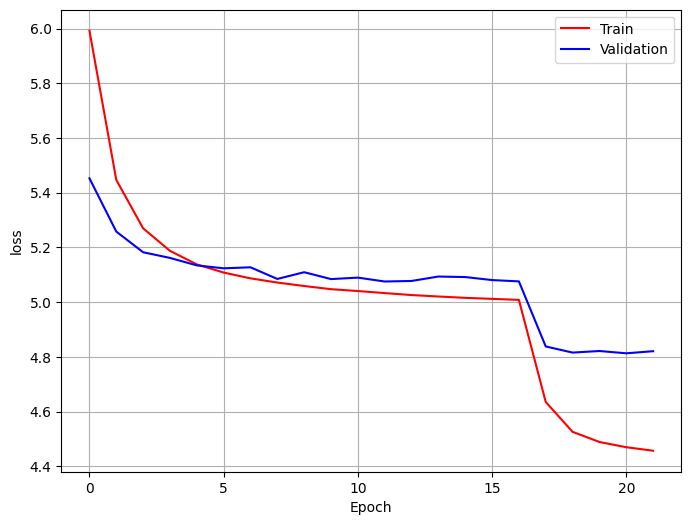

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

# 🔴 **Test**

🔰 Test your model using data from the test set

In [ ]:
model_path = '/content/model.pt'
model = torch.load(model_path)
model.eval()

LanguageModel(
  (embedding): Embedding(28782, 100)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(100, 512, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=512, out_features=28782, bias=True)
)

In [ ]:
loss_test, metric_test = evaluate(model, test_loader, loss_fn, metric)

# 🔴 **Generate**

In [ ]:
model_path = 'model.pt'
model = torch.load(model_path)
model.eval()

LanguageModel(
  (embedding): Embedding(28782, 100)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(100, 512, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=512, out_features=28782, bias=True)
)

In [ ]:
def generate(prompt, max_seq_len, temperature, model, tokenizer, vocab, seed=None):
  indices = vocab(tokenize_dataset(prompt))
  itos = vocab.get_itos()

  max_seq_len = 10
  for i in range(max_seq_len):

    src = torch.LongTensor(indices).to(device)

    with torch.no_grad():
      output = model(src)

    probs = torch.softmax(output[-1]/temperature, dim = 0)

    idx = vocab['<unk>']
    while idx == vocab['<unk>']:
      idx = torch.multinomial(probs, num_samples =1).item()

    token = itos[idx]
    prompt += ' ' + token

prompt = "Once upon a time, in a small village nestled between towering mountains,"
test = generate(prompt, 35, 0.5 , model, tokenize_dataset, vocab):
test

In [ ]:
import torch

def generate(prompt, max_seq_len, temperature, model, tokenizer, vocab, seed=None):
    indices = vocab(tokenizer(prompt))
    itos = vocab.get_itos()

    if seed is not None:
        torch.manual_seed(seed)

    for i in range(max_seq_len):
        src = torch.LongTensor(indices).to(device)

        with torch.no_grad():
            output = model(src)
        logits = output[-1]
        probs = torch.softmax(logits / temperature, dim=-1)

        idx = vocab['<unk>']
        while idx == vocab['<unk>']:
            idx = torch.multinomial(probs, num_samples=1).item()

        token = itos[idx]
        prompt += ' ' + token
        indices.append(idx)

    return prompt

prompt = "Once upon a time, in a small village nestled between towering mountains,"
test = generate(prompt, 35, 0.5, model, tokenize_dataset, vocab)
print(test)


Once upon a time, in a small village nestled between towering mountains, and the french columbia and the dutch east . the original name was a popular culture in the early 19th century , and was the first of these works to be found . in the
